In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

In [2]:
filename_1='CCSM4_midHolocene.cvdp_data.1000-1300.nc'
ccsm=xr.open_dataset(filename_1,decode_times=False)

filename_2='CCSM4_piControl.cvdp_data.250-1300.nc'
pi_ccsm=xr.open_dataset(filename_2,decode_times=False)

filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)

filename_7='FGOALS-g2_midHolocene.cvdp_data.340-1019.nc'
fgoalsg2=xr.open_dataset(filename_7,decode_times=False)

filename_8='FGOALS-g2_piControl.cvdp_data.201-900.nc'
pi_fgoalsg2=xr.open_dataset(filename_8,decode_times=False)

filename_31='FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_31,decode_times=False)

filename_32='FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'
pi_fgoalsf3=xr.open_dataset(filename_32,decode_times=False)


filename_11='GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_15='INM-CM4-8_midHolocene.cvdp_data.1880-2079.nc'
inm=xr.open_dataset(filename_15,decode_times=False)

filename_16='INM-CM4-8_piControl.cvdp_data.1850-2380.nc'
pi_inm=xr.open_dataset(filename_16,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)


filename_21='MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc'
mpi2=xr.open_dataset(filename_21,decode_times=False)

filename_22='MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc'
pi_mpi2=xr.open_dataset(filename_22,decode_times=False)

filename_23='MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc'
mri=xr.open_dataset(filename_23,decode_times=False)

filename_24='MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc'
pi_mri=xr.open_dataset(filename_24,decode_times=False)

filename_25='MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc'
mpip=xr.open_dataset(filename_25,decode_times=False)

filename_26='MPI-ESM-P_piControl.cvdp_data.1850-3005.nc'
pi_mpip=xr.open_dataset(filename_26,decode_times=False)


filename_27='MRI-CGCM3_midHolocene.cvdp_data.1951-2050.nc'
mri3=xr.open_dataset(filename_27,decode_times=False)

filename_28='MRI-CGCM3_piControl.cvdp_data.1851-2350.nc'
pi_mri3=xr.open_dataset(filename_28,decode_times=False)

filename_29='NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)



## load the variable: amoc & sst /tas  (annual) regression 

In [3]:
max_amoc_30_diff=[-0.25353432,0.30673027, 1.2563648,-0.37423325,0.48369217, 0.10418701, 1.3791008, -0.7268448, -0.5384302, -0.00030136108, 2.2410336,0.59828186, 0.8695841,0.2731018]

In [4]:
Modelname=['ccsm', 'cesm', 'ec', 'fgoalsg2', 'fgoalsf3','giss',
          'hadgem', 'inm', 'ipsl', 'mpi2', 'mri',
          'mpip', 'mri3', 'noresm2']

In [5]:
sst_reg_modelname=['CCSM4','CESM2','EC-Earth3-LR','FGOALS-G2','FGOALS-f3-L','GISS-E2-1-G','HadGEM3-GC31-LL',
           'INM-CM4-8','IPSL-CM6A-LR','MPI-ESM1-2-LR','MRI-ESM2-0','MPI-ESM-P','MRI-CGCM3',
           'NorESM2-LM']

In [6]:
name=[ccsm,cesm,ec,fgoalsg2,fgoalsf3,
      giss,hadgem,inm,ipsl,
      mpi2,mri,mpip,mri3,noresm2]

In [7]:
##
ccsm_amoc_tas=ccsm.amoc_tas_regression_ann
pi_ccsm_amoc_tas=pi_ccsm.amoc_tas_regression_ann

cesm_amoc_tas=cesm.amoc_tas_regression_ann
pi_cesm_amoc_tas=pi_cesm.amoc_tas_regression_ann

ec_amoc_tas=ec.amoc_tas_regression_ann
pi_ec_amoc_tas=pi_ec.amoc_tas_regression_ann

fgoalsg2_amoc_tas=fgoalsg2.amoc_tas_regression_ann
pi_fgoalsg2_amoc_tas=pi_fgoalsg2.amoc_tas_regression_ann

fgoalsf3_amoc_tas=fgoalsf3.amoc_tas_regression_ann
pi_fgoalsf3_amoc_tas=pi_fgoalsf3.amoc_tas_regression_ann

giss_amoc_tas=giss.amoc_tas_regression_ann
pi_giss_amoc_tas=pi_giss.amoc_tas_regression_ann

hadgem_amoc_tas=hadgem.amoc_tas_regression_ann
pi_hadgem_amoc_tas=pi_hadgem.amoc_tas_regression_ann

inm_amoc_tas=inm.amoc_tas_regression_ann
pi_inm_amoc_tas=pi_inm.amoc_tas_regression_ann

ipsl_amoc_tas=ipsl.amoc_tas_regression_ann
pi_ipsl_amoc_tas=pi_ipsl.amoc_tas_regression_ann

mpi2_amoc_tas=mpi2.amoc_tas_regression_ann
pi_mpi2_amoc_tas=pi_mpi2.amoc_tas_regression_ann

mri_amoc_tas=mri.amoc_tas_regression_ann
pi_mri_amoc_tas=pi_mri.amoc_tas_regression_ann

mpip_amoc_tas=mpip.amoc_tas_regression_ann
pi_mpip_amoc_tas=pi_mpip.amoc_tas_regression_ann

mri3_amoc_tas=mri3.amoc_tas_regression_ann
pi_mri3_amoc_tas=pi_mri3.amoc_tas_regression_ann

noresm2_amoc_tas=noresm2.amoc_tas_regression_ann
pi_noresm2_amoc_tas=pi_noresm2.amoc_tas_regression_ann



In [8]:
amoc_tas=[ccsm_amoc_tas, cesm_amoc_tas, ec_amoc_tas, fgoalsg2_amoc_tas, fgoalsf3_amoc_tas, 
         giss_amoc_tas, hadgem_amoc_tas, inm_amoc_tas, ipsl_amoc_tas, 
         mpi2_amoc_tas, mri_amoc_tas, mpip_amoc_tas, mri3_amoc_tas, 
          noresm2_amoc_tas]

In [9]:
pi_amoc_tas=[pi_ccsm_amoc_tas, pi_cesm_amoc_tas, pi_ec_amoc_tas, pi_fgoalsg2_amoc_tas, pi_fgoalsf3_amoc_tas, 
         pi_giss_amoc_tas, pi_hadgem_amoc_tas, pi_inm_amoc_tas, pi_ipsl_amoc_tas, 
         pi_mpi2_amoc_tas, pi_mri_amoc_tas, pi_mpip_amoc_tas, pi_mri3_amoc_tas,
             pi_noresm2_amoc_tas]

In [10]:
## use this one: 
for j in range (0,len(Modelname)):
    globals()[Modelname[j]+'_tas_change_caused_by_amoc']=max_amoc_30_diff[j]*(amoc_tas[j] + pi_amoc_tas[j])/2

In [12]:
##
ccsm_tas_ann=ccsm.tas_spatialmean_ann
pi_ccsm_tas_ann=pi_ccsm.tas_spatialmean_ann

cesm_tas_ann=cesm.tas_spatialmean_ann
pi_cesm_tas_ann=pi_cesm.tas_spatialmean_ann

ec_tas_ann=ec.tas_spatialmean_ann
pi_ec_tas_ann=pi_ec.tas_spatialmean_ann

fgoalsg2_tas_ann=fgoalsg2.tas_spatialmean_ann
pi_fgoalsg2_tas_ann=pi_fgoalsg2.tas_spatialmean_ann

fgoalsf3_tas_ann=fgoalsf3.tas_spatialmean_ann
pi_fgoalsf3_tas_ann=pi_fgoalsf3.tas_spatialmean_ann

giss_tas_ann=giss.tas_spatialmean_ann
pi_giss_tas_ann=pi_giss.tas_spatialmean_ann

hadgem_tas_ann=hadgem.tas_spatialmean_ann
pi_hadgem_tas_ann=pi_hadgem.tas_spatialmean_ann

inm_tas_ann=inm.tas_spatialmean_ann
pi_inm_tas_ann=pi_inm.tas_spatialmean_ann

ipsl_tas_ann=ipsl.tas_spatialmean_ann
pi_ipsl_tas_ann=pi_ipsl.tas_spatialmean_ann

mpi2_tas_ann=mpi2.tas_spatialmean_ann
pi_mpi2_tas_ann=pi_mpi2.tas_spatialmean_ann

mri_tas_ann=mri.tas_spatialmean_ann
pi_mri_tas_ann=pi_mri.tas_spatialmean_ann

mpip_tas_ann=mpip.tas_spatialmean_ann
pi_mpip_tas_ann=pi_mpip.tas_spatialmean_ann

mri3_tas_ann=mri3.tas_spatialmean_ann
pi_mri3_tas_ann=pi_mri3.tas_spatialmean_ann

noresm2_tas_ann=noresm2.tas_spatialmean_ann
pi_noresm2_tas_ann=pi_noresm2.tas_spatialmean_ann


In [13]:
tas_ann=[ccsm_tas_ann, cesm_tas_ann, ec_tas_ann, fgoalsg2_tas_ann, fgoalsf3_tas_ann,
         giss_tas_ann, hadgem_tas_ann, inm_tas_ann, ipsl_tas_ann, 
         mpi2_tas_ann, mri_tas_ann, mpip_tas_ann, mri3_tas_ann, 
          noresm2_tas_ann]

In [14]:
pi_tas_ann=[pi_ccsm_tas_ann, pi_cesm_tas_ann, pi_ec_tas_ann, pi_fgoalsg2_tas_ann, pi_fgoalsf3_tas_ann, 
         pi_giss_tas_ann, pi_hadgem_tas_ann, pi_inm_tas_ann, pi_ipsl_tas_ann, 
         pi_mpi2_tas_ann, pi_mri_tas_ann, pi_mpip_tas_ann, pi_mri3_tas_ann, 
         pi_noresm2_tas_ann]

In [15]:
for j in range (0,len(Modelname)):
    globals()[Modelname[j]+'_tas_change']=tas_ann[j] - pi_tas_ann[j]

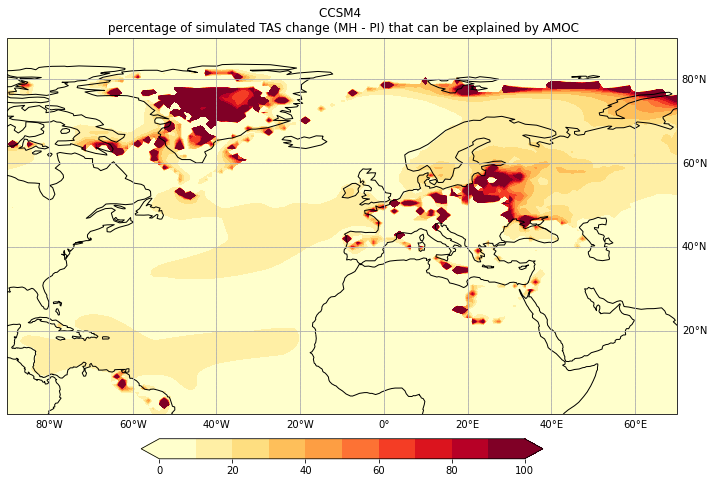

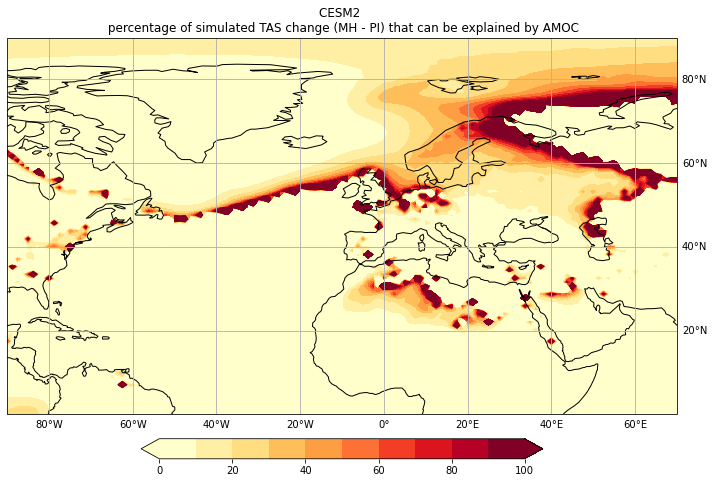

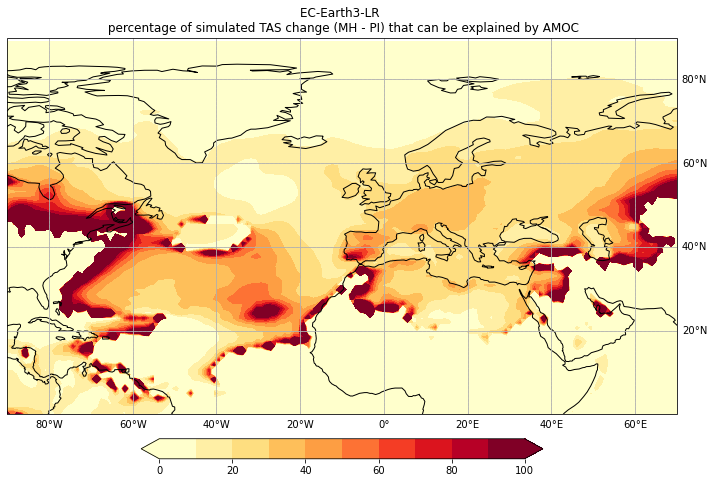

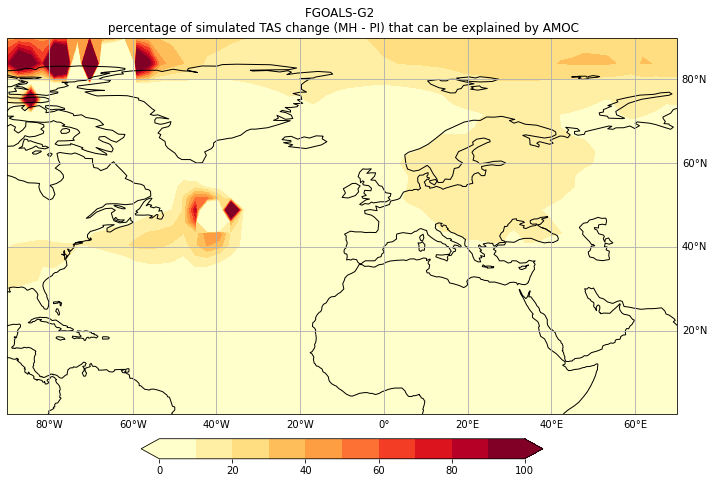

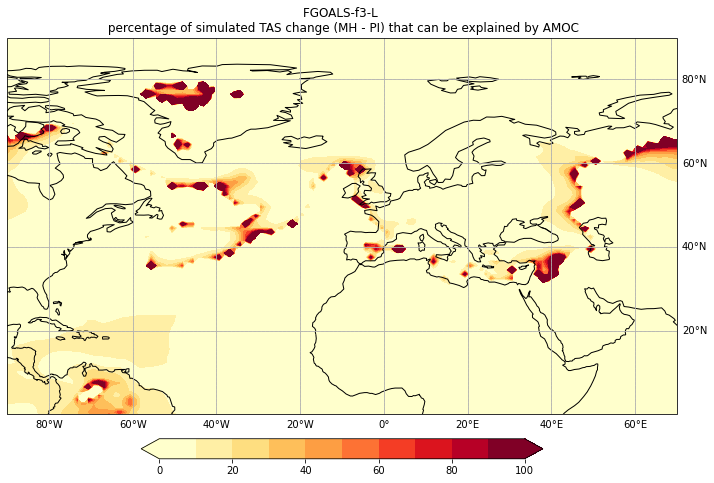

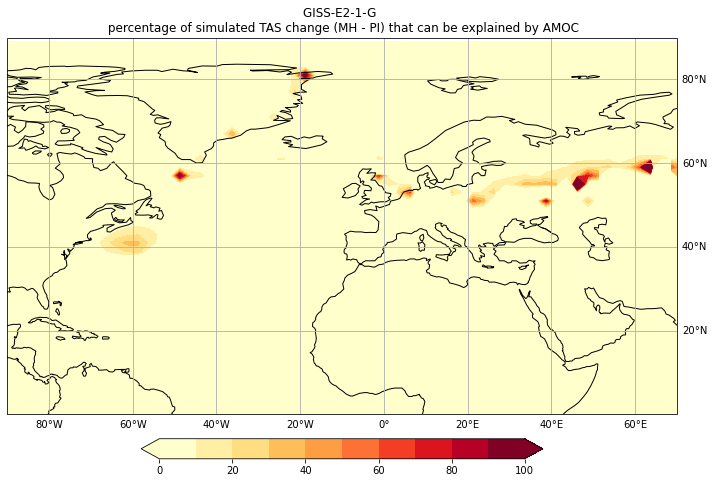

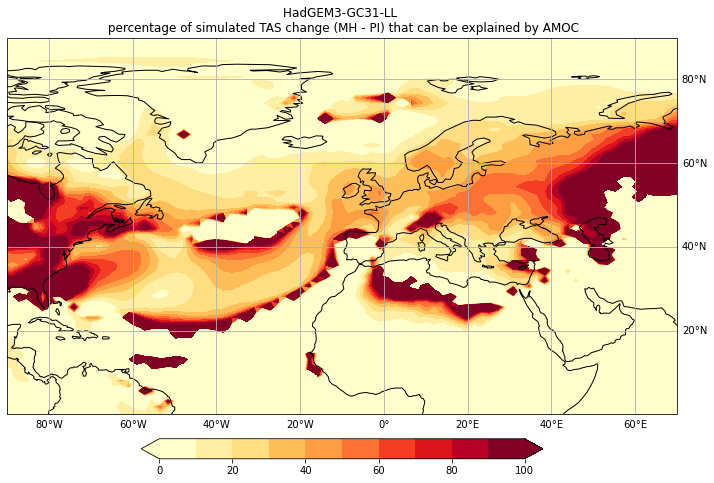

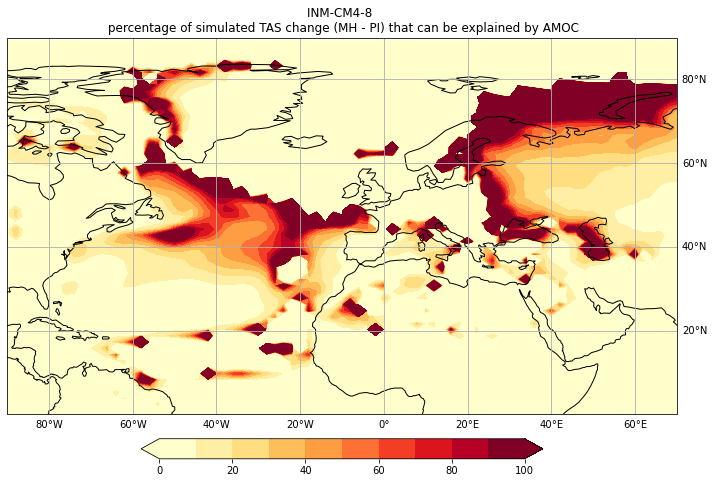

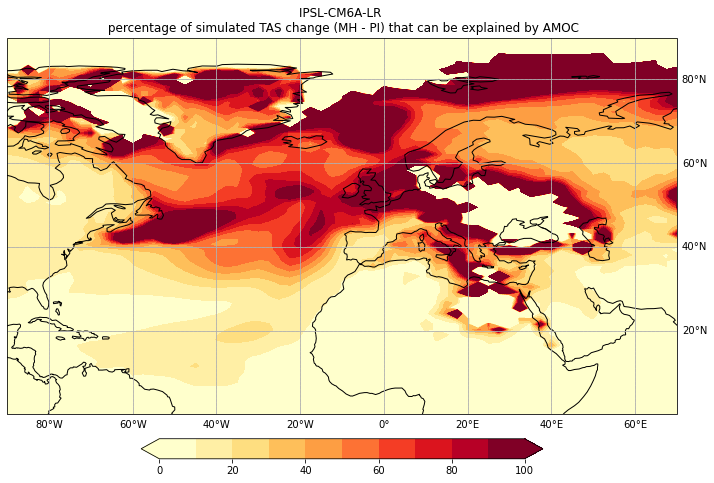

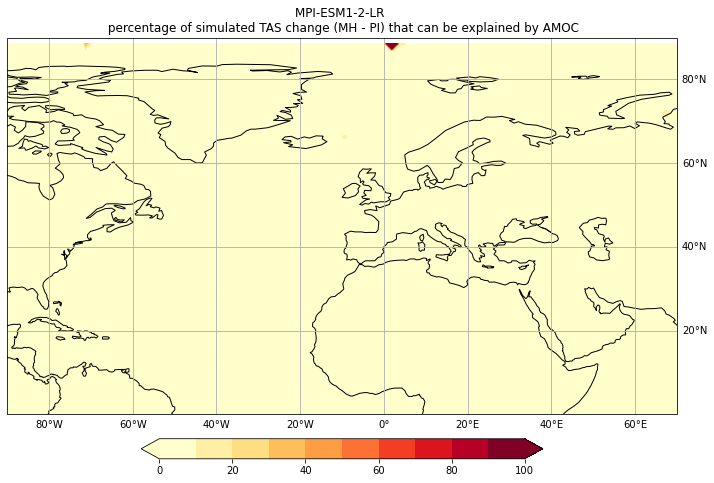

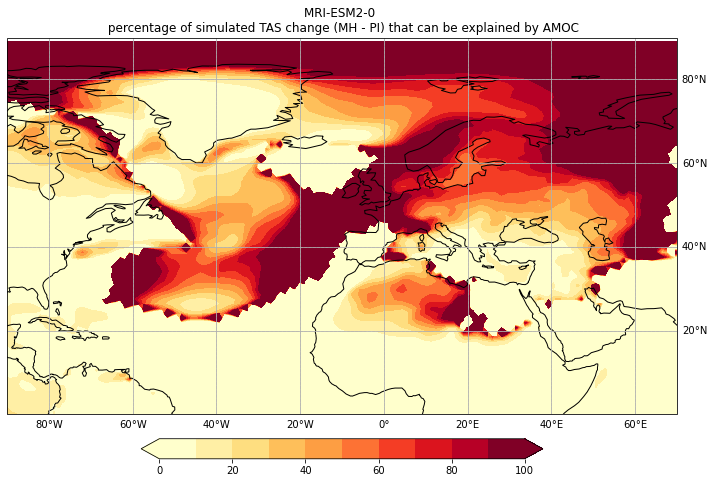

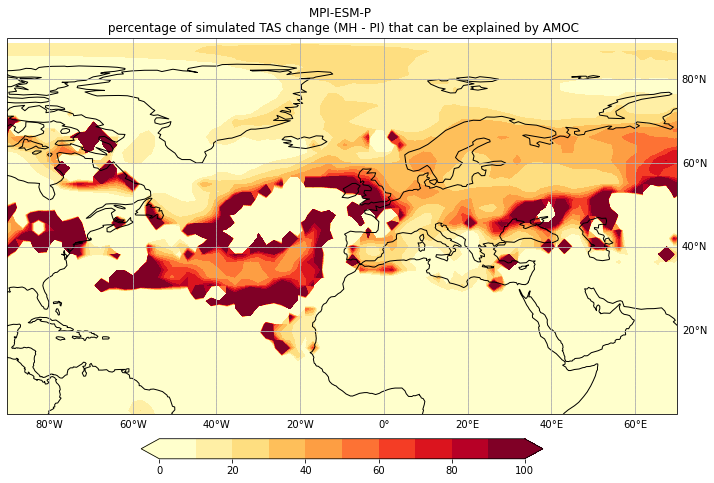

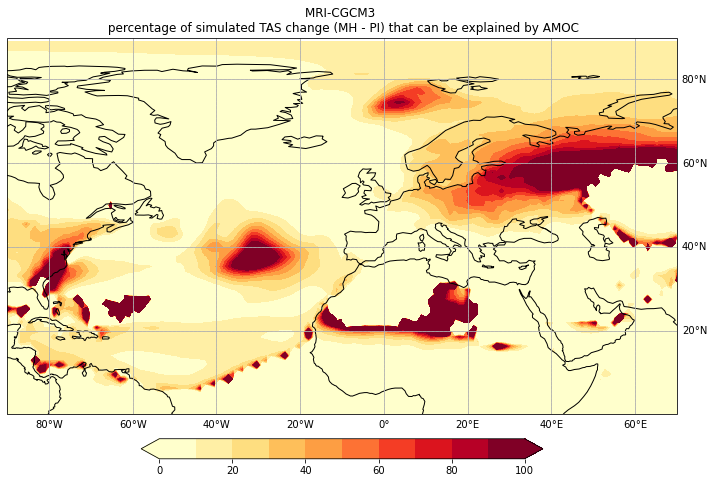

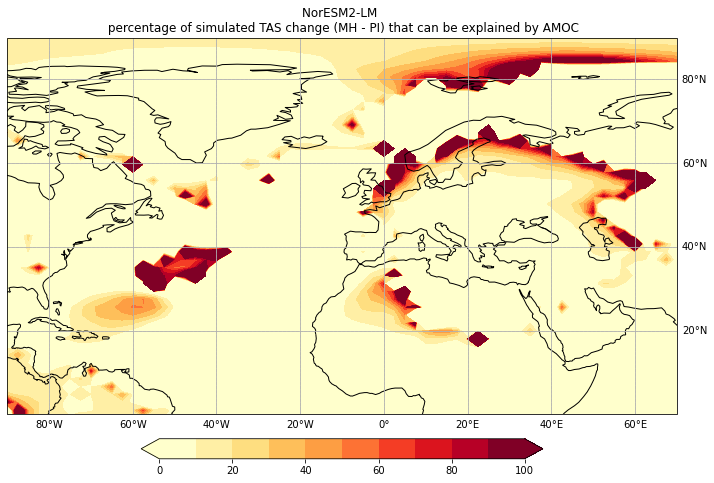

In [16]:
## use this one:
for i in range (0, len(Modelname)):
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

    transform=ccrs.PlateCarree()
    bounds_1 = np.linspace(-3,3,13)
    bounds_2 = np.arange(0,110,10)
    norm_1 = colors.BoundaryNorm(boundaries=bounds_1, ncolors=256)
    norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

    lat_1 = globals()[Modelname[i]+'_tas_change'].lat
    lon_1 = globals()[Modelname[i]+'_tas_change'].lon
    lat_2 = globals()[Modelname[i]+'_tas_change_caused_by_amoc'].lat
    lon_2 = globals()[Modelname[i]+'_tas_change_caused_by_amoc'].lon

    globals()[Modelname[i]+'_tas_change'], lon_1 = add_cyclic_point(globals()[Modelname[i]+'_tas_change'], coord=lon_1)
    globals()[Modelname[i]+'_tas_change_caused_by_amoc'], lon_2 = add_cyclic_point(globals()[Modelname[i]+'_tas_change_caused_by_amoc'], coord=lon_2)

    plt.figure(figsize=(12,9))
    ax= plt.axes(projection=projection)

    ax.coastlines()
    ax.gridlines()
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom=True
    gl.ylabels_left = False
    gl.ylabels_right=True

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    region=[-90,70,0,90] #[lon_min,lon_max,lat_min,lat_max]
    coe_fig=ax.contourf(lon_2, lat_2, 100 * globals()[Modelname[i]+'_tas_change_caused_by_amoc'] / globals()[Modelname[i]+'_tas_change'], levels=bounds_2,transform=transform, cmap='YlOrRd',extend='both', norm=norm_2) 
    
    ax.set_extent(region, ccrs.PlateCarree())    


    cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.6)

    plt.colorbar(coe_fig,cax=cax_2,extend='both',**kw_2)
    ax.set(title='%s \n percentage of simulated TAS change (MH - PI) that can be explained by AMOC' %(sst_reg_modelname[i]))
    

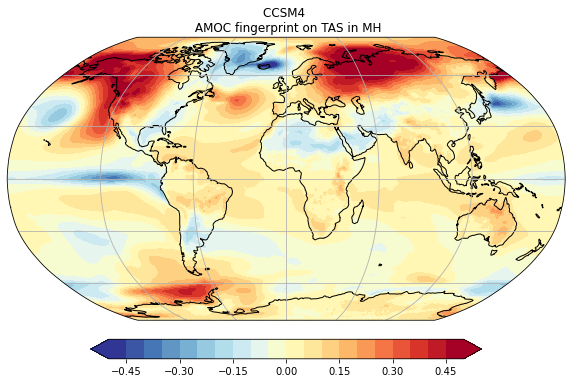

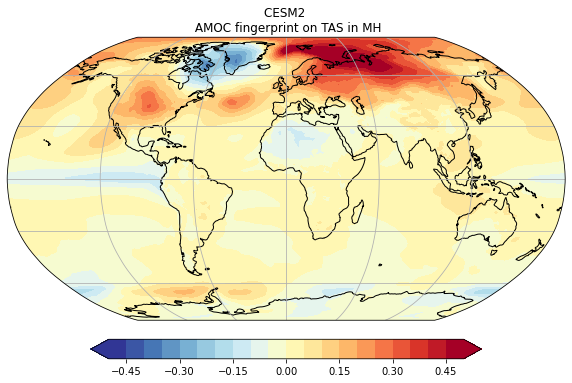

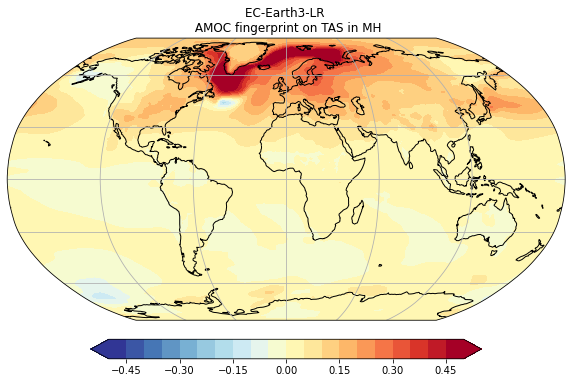

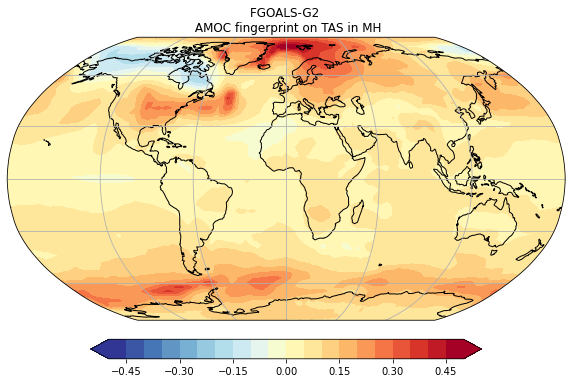

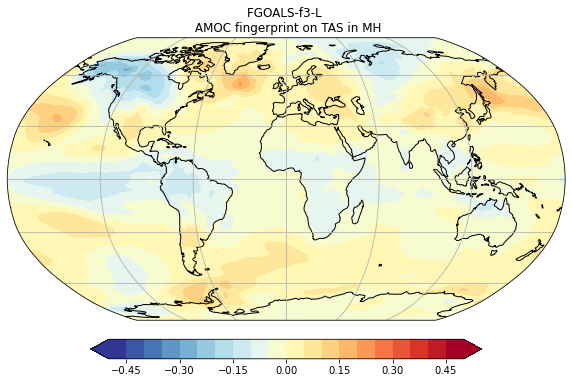

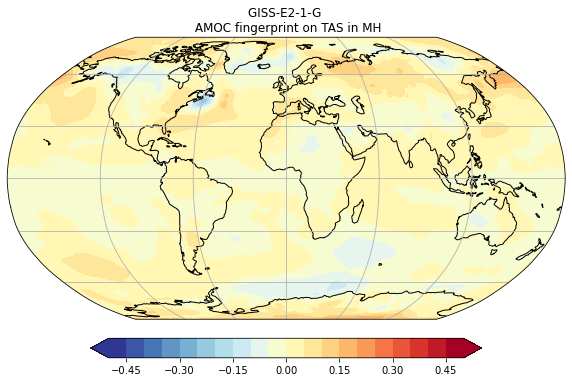

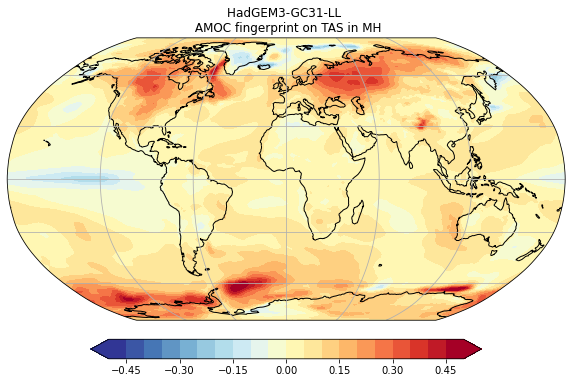

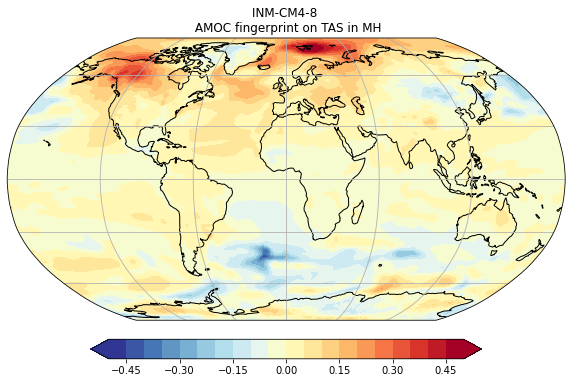

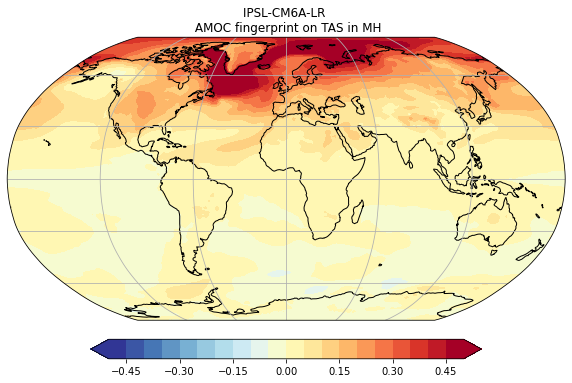

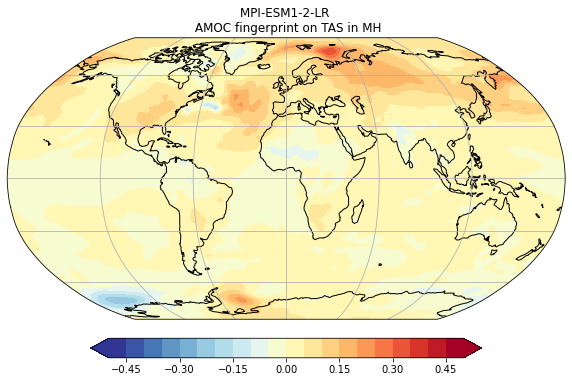

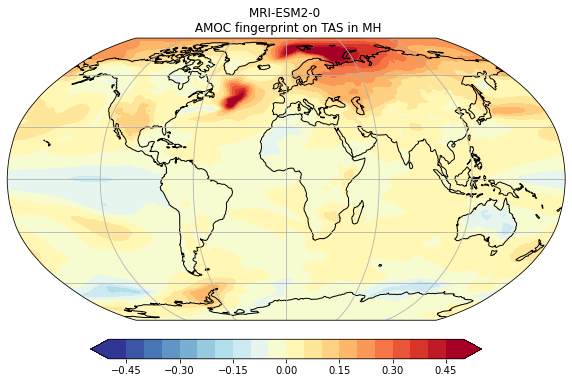

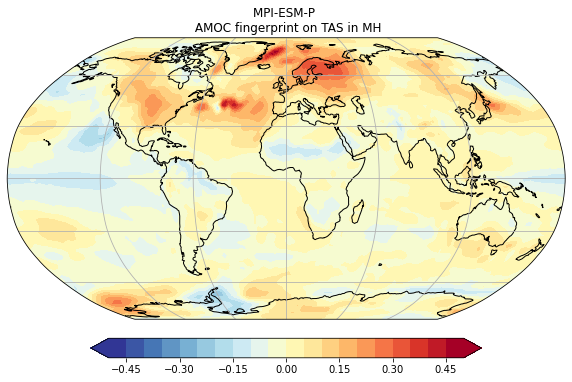

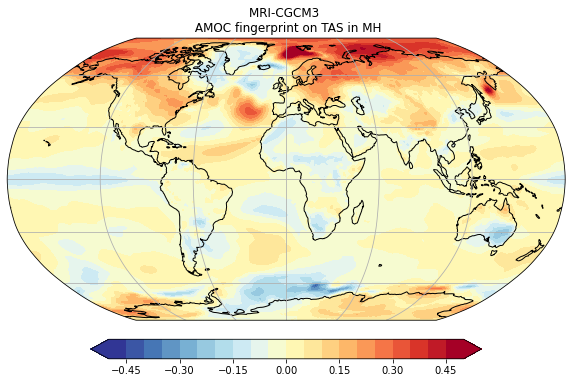

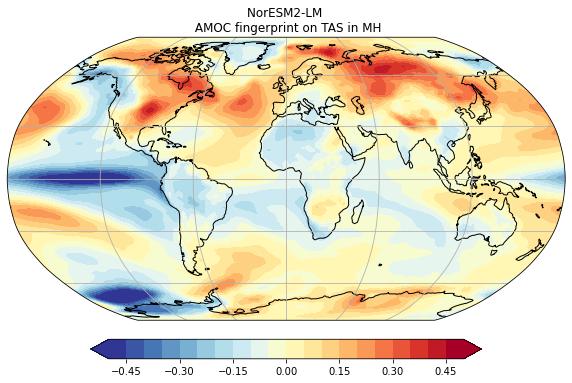

In [17]:
## plotting TAS-AMOC regression coefficients in MH

for i in range (0,len(Modelname)):

    projection = ccrs.Robinson()

    transform=ccrs.PlateCarree()
    bounds = np.linspace(-0.5,0.5,21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    lat = name[i].lat
    lon = name[i].lon

    amoc_tas[i], lon = add_cyclic_point(amoc_tas[i], coord=lon)
    
    plt.figure(figsize=(10,7))
    ax1= plt.axes(projection=projection)

    ax1.coastlines()
    ax1.gridlines()
    
    fig=ax1.contourf(lon,lat, amoc_tas[i], levels=bounds, transform=transform, cmap='RdYlBu_r',norm=norm, alpha=1.0,extend='both')


    cax,kw = matplotlib.colorbar.make_axes(ax1,location='bottom',pad=0.05,shrink=0.7)
    plt.colorbar(fig,cax=cax,extend='both',**kw)
    ax1.set(title='%s \n AMOC fingerprint on TAS in MH' %(sst_reg_modelname[i]))